In [657]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift, ifft2, ifftshift


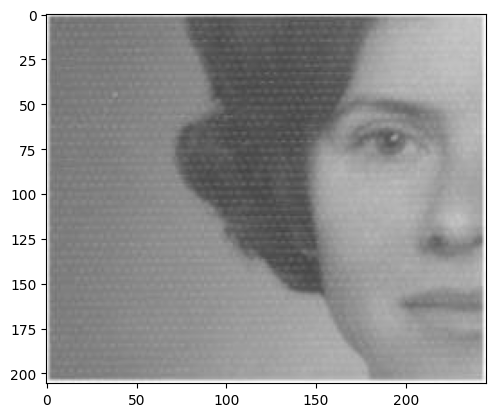

In [658]:
face = plt.imread("face.jpg")

plt.imshow(face, cmap='gray')

In [659]:
face.shape

(206, 245, 3)

In [660]:
def Grayscale_Luminosity(img):
    R = np.array(img[:,:,0], dtype=np.float32)
    G = np.array(img[:,:,1], dtype=np.float32)
    B = np.array(img[:,:,2], dtype=np.float32)
    output = 0.3*R + 0.59*G + 0.11*B
    return output

def Mirror_Padding_v2(img, nx, ny):
    height, width = img.shape
    height_new = height + 2*nx
    width_new = width + 2*ny
    output = np.zeros([height_new, width_new])
    # Center
    output[nx:height_new-nx, ny:width_new-ny] = img
    # Top and Bottom
    output[:nx, ny:width_new-ny] = img[nx-1::-1, :] # Top
    output[height+nx:, ny:width_new-ny] = img[height-1:height-nx-1:-1, :] # Bottom
    # Left and Right
    output[:height_new, :ny] = output[:, 2*ny:ny:-1] # Left
    output[:height_new, width_new-ny:width_new] = output[:, width_new-ny-1:width_new-2*ny-1:-1] # Right
    return output


In [661]:
face = Grayscale_Luminosity(face)
N, M = face.shape
face = face[5:N-5, 5:M-5]

In [662]:
def clear_all(img, a, b, c, d, k=1):
    F = fft2(img)
    F_shift = fftshift(F)
    max_ = np.max((np.log(np.abs(F_shift))).ravel())
    std_ = np.std((np.log(np.abs(F_shift))).ravel())
    mean_ = np.median((np.log(np.abs(F_shift))).ravel())
    mean_f = np.median(F_shift)
    N, M = img.shape
    for i in range(N):
        for j in range(M):
            value = np.log(np.abs(F_shift[i,j]))
            if N//2-a < i < N//2+a and M//2-b < j < M//2+b:
                continue
            if N//2-c < i < N//2+c and M//2-d < j < M//2+d:
                continue
            elif (mean_ + k*std_) < value < (max_):
                F_shift[i,j] = 0
    # Inverse Fourier transform
    G = ifftshift(F_shift)
    g =  ifft2(G)

    return g, F_shift

In [663]:
face_clear, F_shift = clear_all(face, 40, 15, 15, 300, 1.5)
face_clear = np.abs(face_clear)

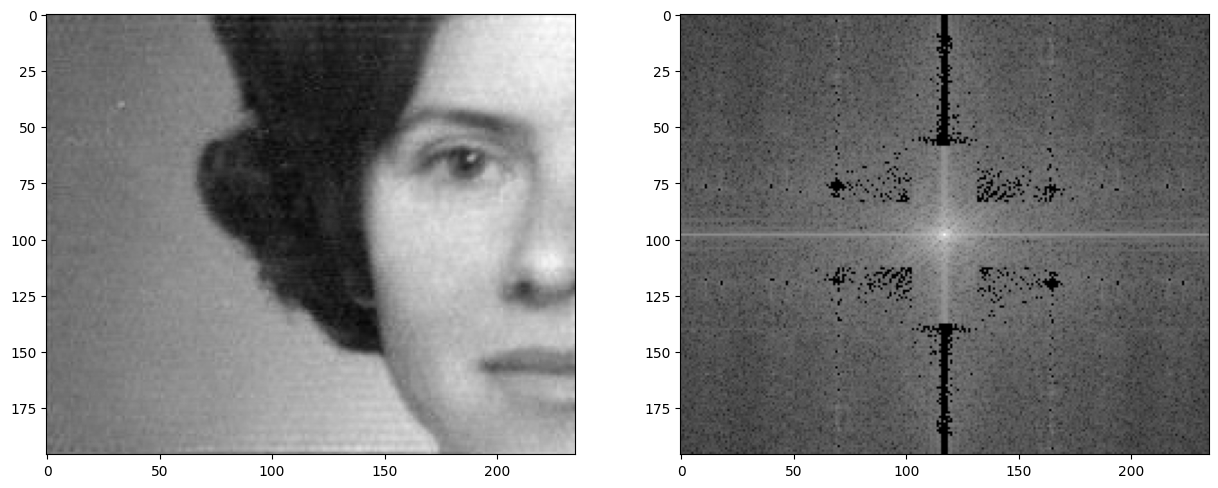

In [664]:

plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.imshow(face_clear, cmap='gray')

plt.subplot(122)
plt.imshow(np.log(np.abs(F_shift)+1), cmap='gray')


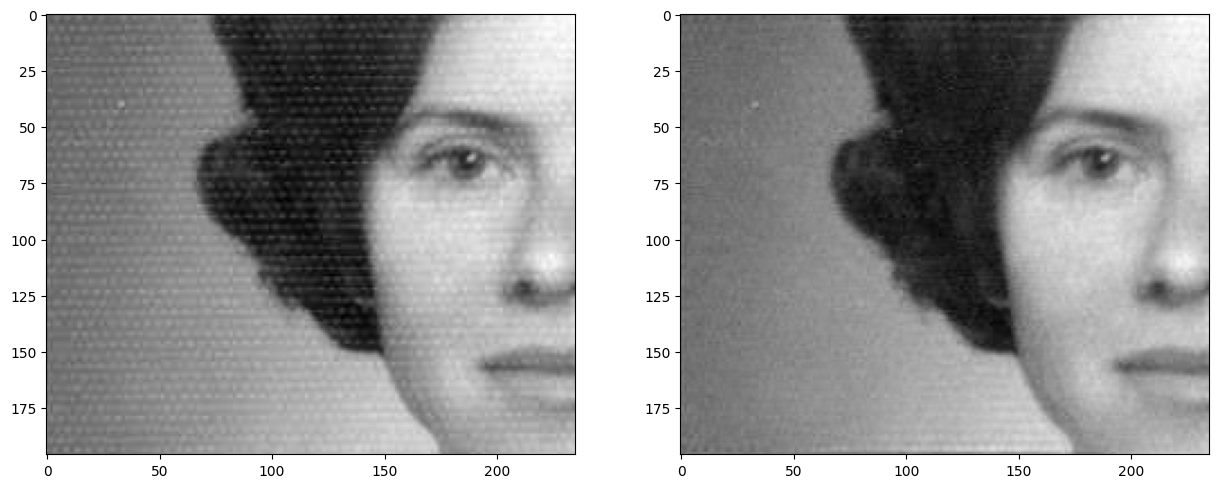

In [665]:

plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.imshow(face, cmap='gray')

plt.subplot(122)
plt.imshow(face_clear, cmap='gray')


In [666]:
def Median_Filter(img, size):
    img = Mirror_Padding_v2(img, size[0], size[1])
    m, n = img.shape
    output = np.zeros([m ,n])
    for x in range(size[0], m-size[0]):
        for y in range(size[1], n-size[1]):
            elements = img[x-size[0]//2:x+size[0]//2+1, y-size[1]//2:y+size[1]//2+1]
            output[x,y] = np.median(elements)
    return output[size[0]:m-size[0], size[1]:n-size[1]]

In [667]:
face_clear_meadian = Median_Filter(face_clear, (5,5))

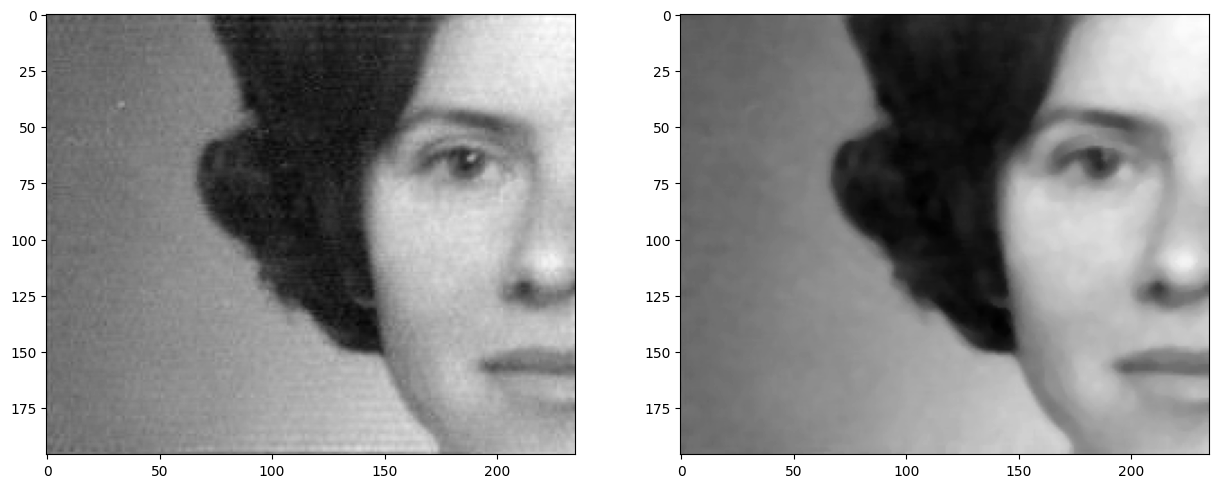

In [668]:

plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.imshow(face_clear, cmap='gray')

plt.subplot(122)
plt.imshow(face_clear_meadian, cmap='gray')


In [669]:
def Sobel_Filter(img, return_abs=False):
    # Get Constant metrices
    wx = np.array([[-1.0,-2.0,-1.0], [0.0,0.0,0.0], [1.0,2.0,1.0]])
    wy = np.array([[-1.0,0.0,1.0], [-2.0,0.0,2.0], [-1.0,0.0,1.0]])
    # Get Constant metrices
    img = Mirror_Padding_v2(img, 3, 3)
    m, n = img.shape
    output = np.zeros([m, n])
    for x in range(3, m-3):
        for y in range(3, n-3):
            elements = img[x-3//2:x+3//2+1, y-3//2:y+3//2+1]
            gx = np.sum(np.multiply(wx, elements))
            gy = np.sum(np.multiply(wy, elements))
            if return_abs == True:
                output[x, y] = np.abs(gx) + np.abs(gy)
            else:    
                output[x, y] = np.sqrt(gx**2 + gy**2)
    return output[3:m-3, 3:n-3]


In [670]:
face_sobel = Sobel_Filter(face_clear_meadian)

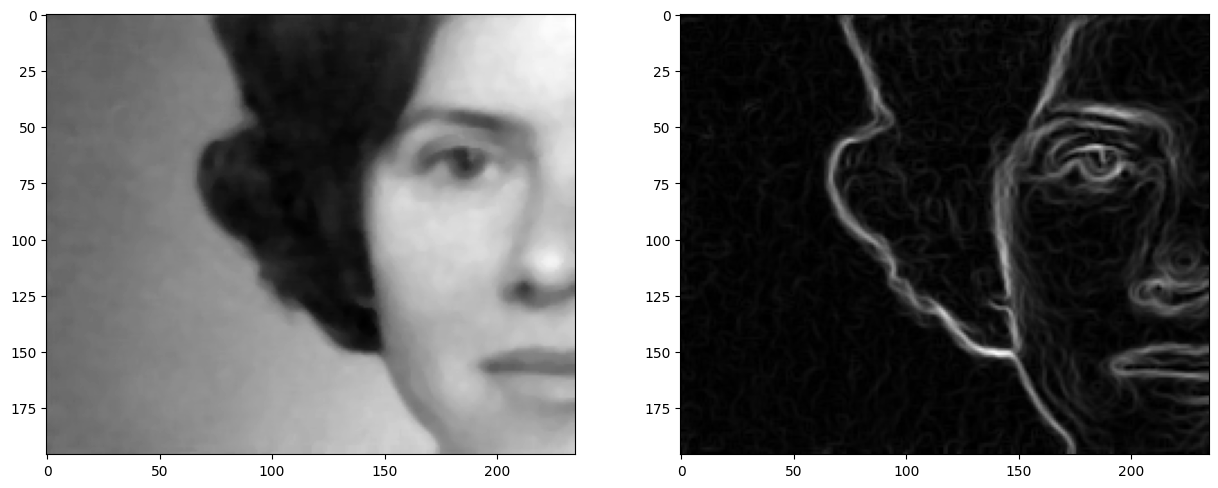

In [671]:

plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.imshow(face_clear_meadian, cmap='gray')

plt.subplot(122)
plt.imshow(face_sobel, cmap='gray')
